In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the file we will create

import seaborn as sns

In [35]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

In [7]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22/08/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11/06/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16/05/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18/07/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01/08/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [8]:
df.tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,22/07/2016,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,06/05/2016,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,25/07/2016,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,02/12/2016,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757,From the Land of the Moon,R,28/07/2017,120,6.7,Marion Cotillard,2411,Milena Agus,2016


In [15]:
df.shape

(6820, 15)

In [28]:
# Describe the aggregate values

df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [20]:
# Check for any missing values in the dataset
print (df.isnull().values.any())

False


In [21]:
# Check for missing values in each column
print (df.isnull().sum())

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64


In [22]:
# Check for the total count of missing values in the dataset
print (df.isnull().sum().sum())

0


In [36]:
# Check the data types
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [39]:
# Convert Released Year to String and Pull Year Out of It

df['ReleasedYear'] = df['released'].astype(str)   # convert to string
df['ReleasedYear'] = df['ReleasedYear'].str[6:11]  #pull year out of it
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,ReleasedYear
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22/08/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11/06/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16/05/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18/07/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01/08/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,22/07/2016,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,06/05/2016,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,25/07/2016,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,02/12/2016,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016


In [56]:
# sort dataset by gross in descending order

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head

<bound method NDFrame.head of          budget                                            company  \
6380  245000000                                          Lucasfilm   
5061  237000000             Twentieth Century Fox Film Corporation   
2420  200000000             Twentieth Century Fox Film Corporation   
6391  150000000                                 Universal Pictures   
5723  220000000                                     Marvel Studios   
4840  185000000                                       Warner Bros.   
6614  200000000                                          Lucasfilm   
6687  200000000                            Pixar Animation Studios   
2870  115000000                                          Lucasfilm   
6398  250000000                                     Marvel Studios   
5720  250000000                                       Warner Bros.   
4001  150000000                                         DreamWorks   
5954  130000000                                        Color

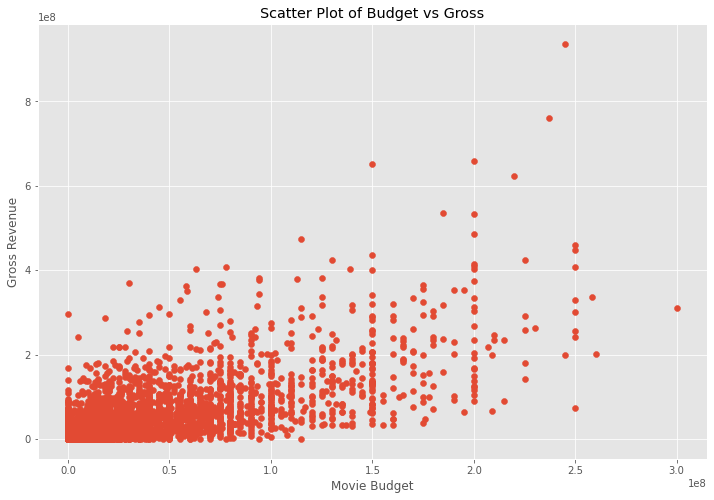

In [50]:
# Build a Scatter Plot of Budget vs Gross

x = df['budget']
y = df['gross']
plt.scatter(x,y)
plt.xlabel('Movie Budget')
plt.ylabel('Gross Revenue')
plt.title('Scatter Plot of Budget vs Gross')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

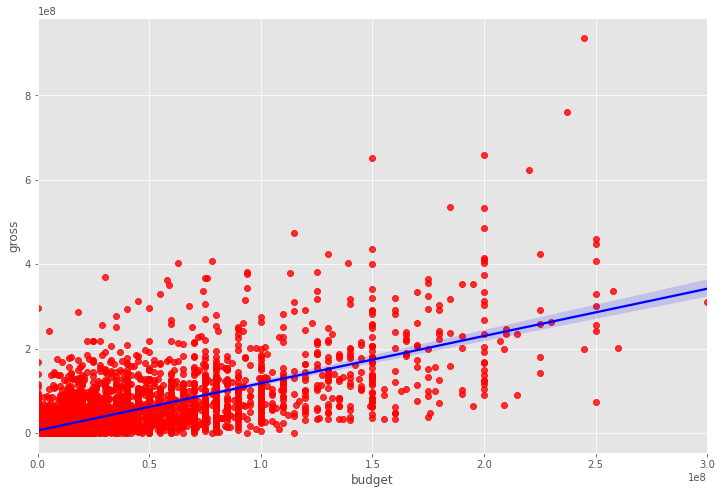

In [52]:
# Build a Seaborn Plot for Budget and Gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [53]:
df.corr(method='pearson') #pearson,kendall,spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


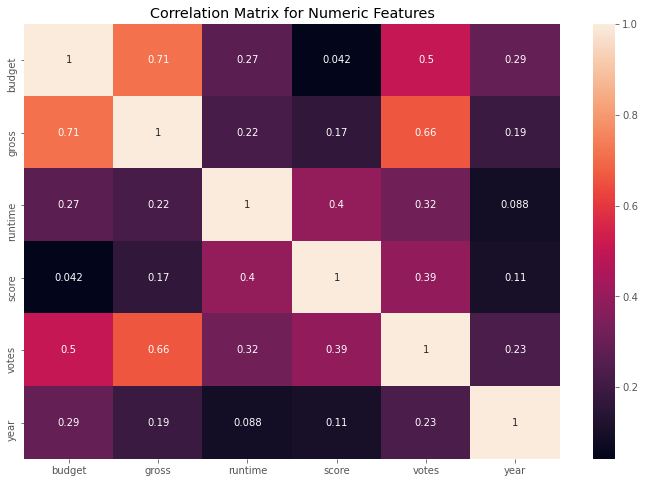

In [55]:
#Building a Heatmap to show the Correlation Matrix

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [ ]:
# Votes and Budget has the highest correlation to Gross Earnings